# Example(Red Wine)

In [1]:
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
import graphviz

In [3]:
df = pd.read_csv('Data/Wine/Wine_red.csv', sep=';')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [4]:
df.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [5]:
df['rating'] = pd.qcut(df.quality , q=2, labels = ['bad','good'])
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad


In [6]:
df.rating.value_counts()

bad     1382
good     217
Name: rating, dtype: int64

In [7]:
df['rating'] = pd.cut(df.quality,[0,5,10],labels = ['bad','good'])
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad


In [8]:
df.rating.value_counts()

good    855
bad     744
Name: rating, dtype: int64

In [9]:
attributes = df.drop(['quality','rating'], axis = 1)
target = df.rating

In [11]:
# Initialize the tree
Tree = tree.DecisionTreeClassifier(max_depth = 2) #understading data other than prediction -> 2 levels

In [13]:
Tree.fit(attributes,target)

DecisionTreeClassifier(max_depth=2)

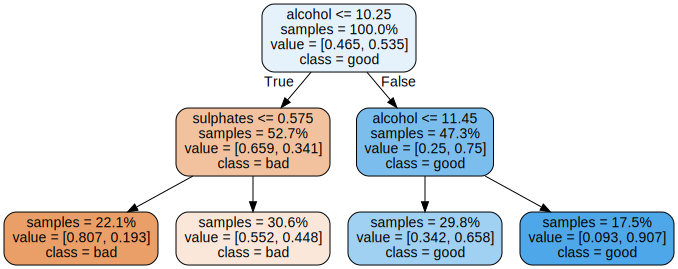

In [19]:
dot_data = tree.export_graphviz(Tree,
                               out_file=None,
                               feature_names=attributes.columns,
                               class_names = ['bad','good'],
                               proportion=True,
                               impurity=False,
                               filled=True,
                               rounded=True)
graph = graphviz.Source(dot_data)
graph.render('RedWine')
graph
# value=[percent of bad, percent of good]
# 744/(744+855)=0.465 -> good percentage in the beginning
# leaf node samples = error rate
# choose best attribute